# Extracting data through NCI THREDDS Data Server

## This notebook covers
Extracting data for:
- Full spatial layer for single time
- Timeseries for single point

Using several data serving options:
- THREDDS OPeNDAP
- THREDDS NCSS
- Direct download of file


In [34]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt 
from siphon import catalog, ncss
import datetime
%matplotlib inline

In [2]:
url = 'http://dapds00.nci.org.au/thredds/catalog/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/catalog.xml?dataset=rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-14_2013.nc'

In [3]:
tds = catalog.TDSCatalog(url)
datasets = list(tds.datasets)
endpts = tds.datasets.values()

In [4]:
for key, value in endpts[0].access_urls.items():
    print key, value

UDDC http://dapds00.nci.org.au/thredds/uddc/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-14_2013.nc
WCS http://dapds00.nci.org.au/thredds/wcs/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-14_2013.nc
HTTPServer http://dapds00.nci.org.au/thredds/fileServer/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-14_2013.nc
WMS http://dapds00.nci.org.au/thredds/wms/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-14_2013.nc
NCML http://dapds00.nci.org.au/thredds/ncml/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-14_2013.nc
NetcdfSubset http://dapds00.nci.org.au/thredds/ncss/grid/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-14_2013.nc
ISO http://dapds00.nci.org.au/thredds/iso/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-14_2013.nc
OPENDAP http://dapds00.nci.org.au/thredds/dodsC/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-14_2013.nc


In [5]:
#http://dapds00.nci.org.au/thredds/ncss/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc?req=station&var=band_2&var=band_4&latitude=-19&longitude=122.5&temporal=all&accept=netCDF

In [ ]:
def get_point_all_time(dataset, variables, lat, lon):
    nc = ncss.NCSS(dataset.access_urls['NetcdfSubset'])
    query = nc.query()
    query.lonlat_point(lon, lat)
    query.variables(variables)
    
    data = nc.get_data(query)
    bs = data[variables][0]
#     date = data['date'][0]
    
    print query
    
    return bs #, date

In [65]:
ncss_request = ncss.NCSS(endpts[0].access_urls['NetcdfSubset'])

In [21]:
datetime.utcnow()

datetime.datetime(2016, 9, 20, 4, 14, 2, 743223)

In [52]:
query.lonlat_box(north=-12.0, south=-12.5, east=123.8, west=122.9).all_times()
query.variables('band_2')

var=band_2&temporal=all&west=122.9&east=123.8&north=-12.0&south=-12.5

In [53]:
data = nc.get_data(query)

In [57]:
t = data.variables['time']

In [64]:
data.variables['band_2']

<type 'netCDF4._netCDF4.Variable'>
int16 band_2(time, y, x)
    long_name: Nadir BRDF Adjusted Reflectance 0.45-0.51 microns (Blue)
    units: 1
    grid_mapping: crs
    _FillValue: -999
    _ChunkSizes: [  1 200 200]
    coordinates: time y x 
unlimited dimensions: 
current shape = (10, 2169, 3739)
filling off

In [61]:
num2date(t[:], t.units)

array([datetime.datetime(2013, 7, 11, 1, 55, 41, 331780),
       datetime.datetime(2013, 7, 27, 1, 55, 40, 966651),
       datetime.datetime(2013, 8, 12, 1, 55, 42, 462309),
       datetime.datetime(2013, 8, 28, 1, 55, 44, 909525),
       datetime.datetime(2013, 9, 13, 1, 55, 41, 554937),
       datetime.datetime(2013, 9, 29, 1, 55, 34, 273925),
       datetime.datetime(2013, 10, 15, 1, 55, 33, 800335),
       datetime.datetime(2013, 10, 31, 1, 55, 25, 553052),
       datetime.datetime(2013, 12, 2, 1, 55, 19, 386871),
       datetime.datetime(2013, 12, 18, 1, 55, 11, 378995)], dtype=object)

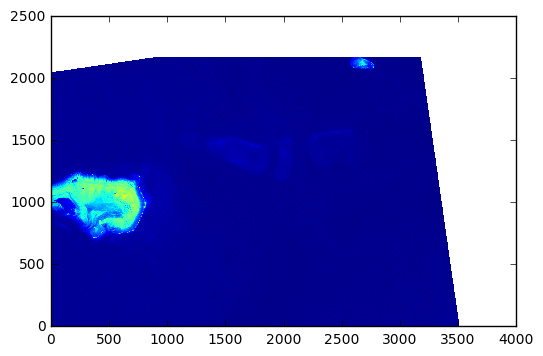

In [63]:
plt.pcolormesh(data['band_2'][0,:,:])

In [51]:
nc.validate_query(query)

True

In [28]:
list(data.variables)

[u'band_2', u'time', u'y', u'x', u'crs']

In [39]:
t = data['time']

# time_base = datetime.date(year=1970, month=1, day=1)
# time = time_base + datetime.timedelta(t[0])

In [37]:
from netCDF4 import num2date

In [40]:
time_val = num2date(t[:].squeeze(), t.units)

In [41]:
time_val

datetime.datetime(2013, 12, 18, 1, 55, 11, 378995)

In [42]:
data['band_2']

<type 'netCDF4._netCDF4.Variable'>
int16 band_2(time, y, x)
    long_name: Nadir BRDF Adjusted Reflectance 0.45-0.51 microns (Blue)
    units: 1
    grid_mapping: crs
    _FillValue: -999
    _ChunkSizes: [  1 200 200]
    coordinates: time y x 
unlimited dimensions: 
current shape = (1, 2169, 3739)
filling off

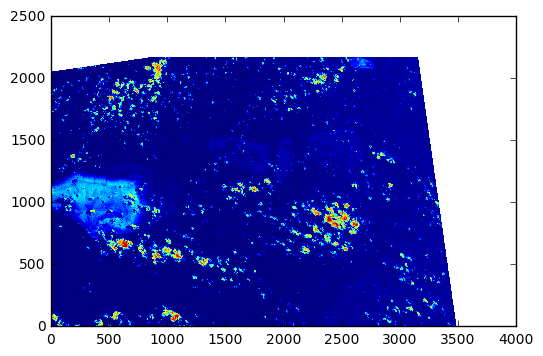

In [43]:
plt.pcolormesh(data['band_2'][0,:,:])

In [17]:
endpts[0].access_urls['NetcdfSubset']

'http://dapds00.nci.org.au/thredds/ncss/grid/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-14_2013.nc'

In [6]:
lon, lat = 123.3, -12.3

In [7]:
lon

123.3

In [11]:
nc = ncss.NCSS(endpts[0].access_urls['NetcdfSubset'])
query = nc.query()
query.lonlat_point(lon, lat)
query.variables('band_2')

var=band_2&latitude=-12.3&longitude=123.3

In [12]:
data = nc.get_data(query)
# bs = data[variables][0]
#     date = data['date'][0]

ValueError: time data '2013-12-18T01:55:11.379Z' does not match format '%Y-%m-%dT%H:%M:%SZ'

In [ ]:
data = []

bs= get_point(endpt, 'band_3', -12.5, 123)
data.append([bs])

In [ ]:
import numpy as np

BS = np.array(data)[:,1]
Date = np.array(data)[:,0]

plt.figure(figsize=(12,6))
plt.plot(Date, BS, '-o', linewidth=2, markersize=8)

plt.tick_params(labelsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('fractional cover of bare soil (%)', fontsize=14)
plt.title('Lat, Lon: -27.75, 137', fontsize=16)

In [ ]:
f = Dataset('/Users/kdruken/Downloads/LS8_OLI_TIRS_NBAR_LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc')

In [ ]:
f.variables

In [ ]:
b2 = f.variables['band_4'][:]

In [ ]:
b2

In [ ]:
t = f.variables['time'][:]

In [ ]:
plt.plot(t,b2,'*')